In [ ]:
# https://www.kaggle.com/code/shamali/notebook653623ed58/edit

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [34]:
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

In [35]:
image_normal = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0122-0001.jpeg")

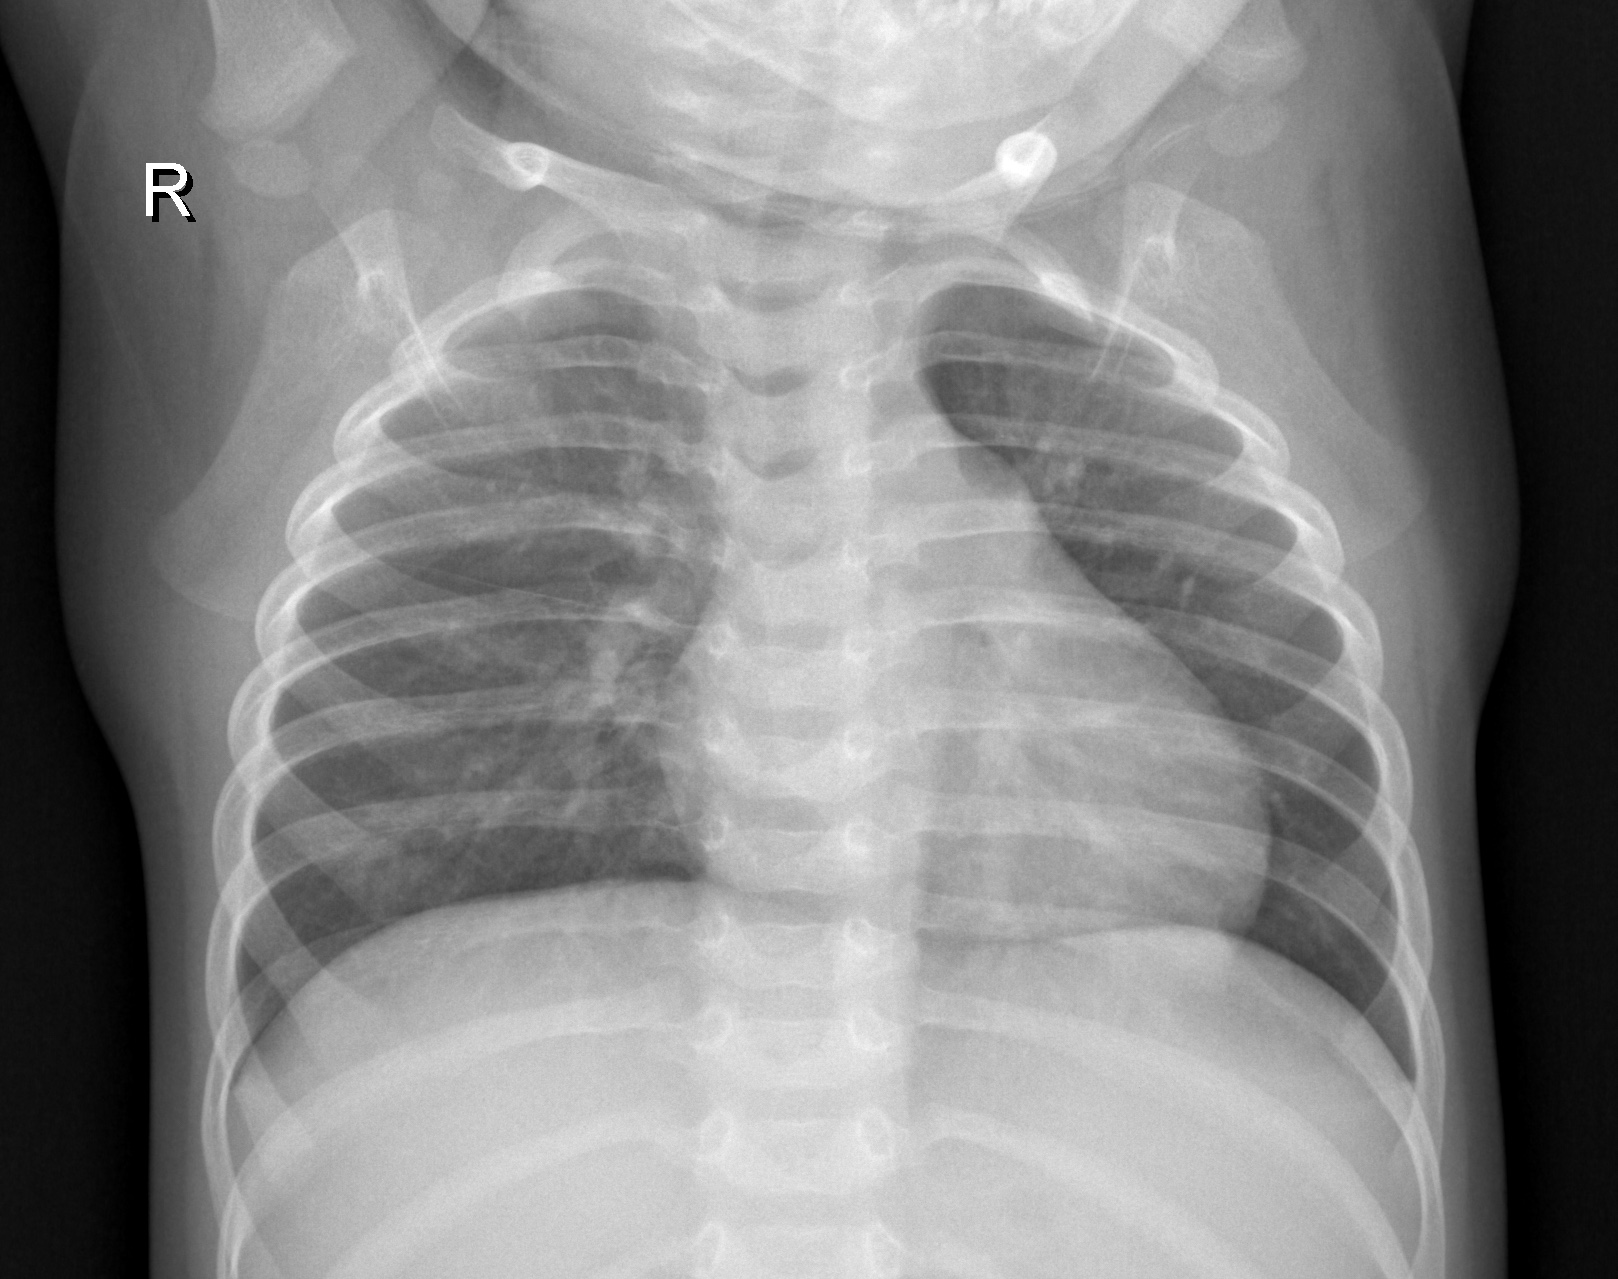

In [36]:
image_normal

In [37]:
image_pneumonia = PIL.Image.open("/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg")

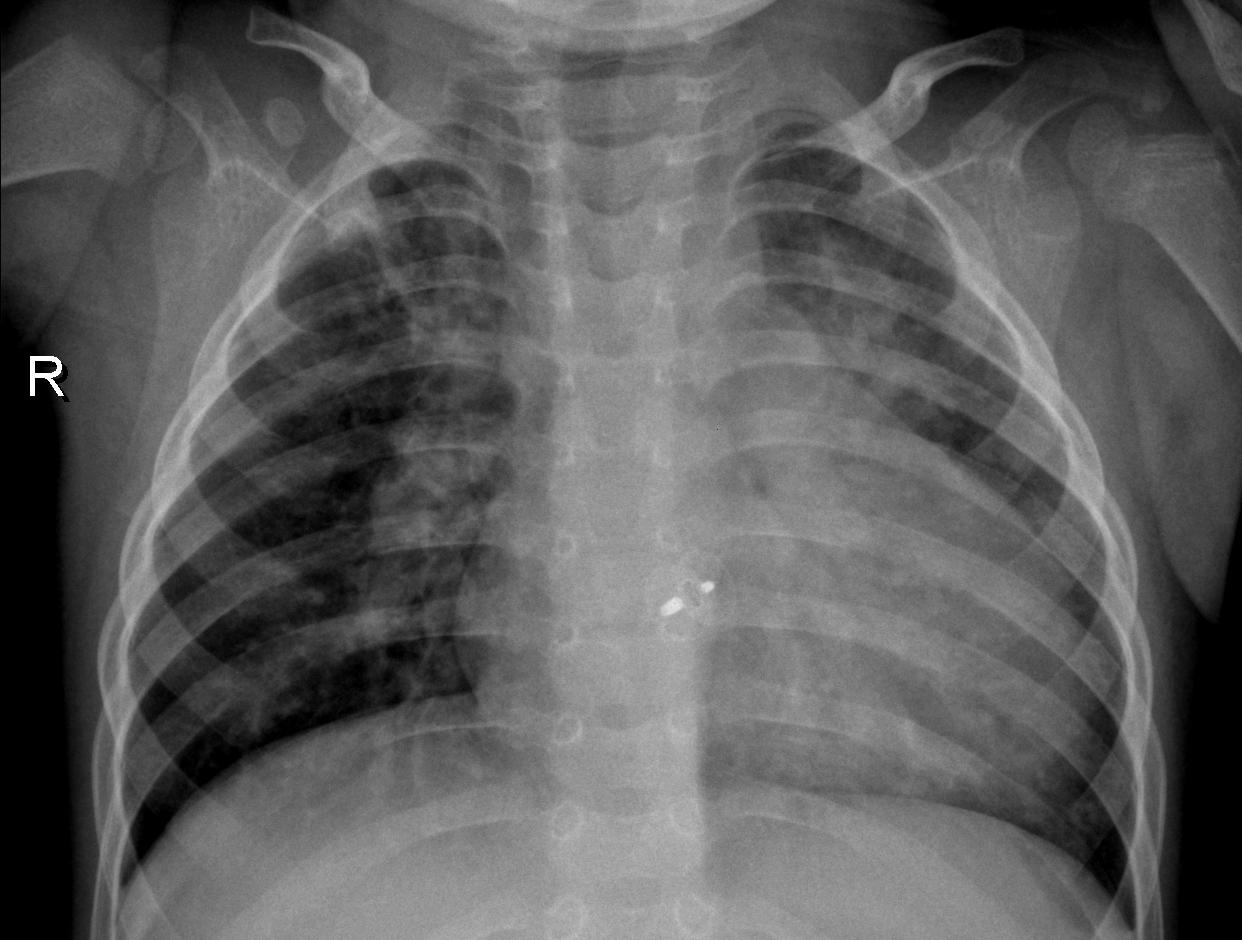

In [38]:
image_pneumonia

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
training_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/"
training_generator = ImageDataGenerator(rescale=1/255)

training_data = training_generator.flow_from_directory(training_dir, target_size=(120,120), batch_size = 8, class_mode='binary')

Found 5216 images belonging to 2 classes.


In [48]:
val_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/"
valid_generator = ImageDataGenerator(rescale=1/255)

val_data = valid_generator.flow_from_directory(val_dir, target_size=(120,120), batch_size = 8, class_mode='binary')

Found 16 images belonging to 2 classes.


In [49]:
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/"
test_generator = ImageDataGenerator(rescale=1/255)

test_data = test_generator.flow_from_directory(test_dir, target_size=(120,120), batch_size = 8, class_mode='binary')

Found 624 images belonging to 2 classes.


In [52]:
#CNN
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), input_shape=(120,120,3), activation="relu"),
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(512, (3,3), activation="relu"),
                            tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1, activation="sigmoid")
                            ])

In [53]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 3, 3, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,569,089 (5.99 MB)

 Trainable params: 1,569,089 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [55]:
history=model.fit(training_data, epochs=2, validation_data=val_data)

Epoch 1/2
  4/652 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.3750 - loss: 0.6970

I0000 00:00:1727753225.788339     965 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_3', 36 bytes spill stores, 36 bytes spill loads



652/652 ━━━━━━━━━━━━━━━━━━━━ 49s 69ms/step - accuracy: 0.7904 - loss: 0.4744 - val_accuracy: 0.7500 - val_loss: 0.3578
Epoch 2/2
652/652 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.9382 - loss: 0.1526 - val_accuracy: 0.8750 - val_loss: 0.2666


In [56]:
model.evaluate(test_data)

 2/78 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.8750 - loss: 0.3521

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.7976 - loss: 0.5067


[0.5193655490875244, 0.7804487347602844]

In [57]:
prediction=model.predict(test_data)

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step


In [58]:
prediction

array([[0.9990269 ],
       [0.9995331 ],
       [0.86071837],
       [0.91732484],
       [0.9944623 ],
       [0.7989181 ],
       [0.23651473],
       [0.8255583 ],
       [0.67209715],
       [0.9982722 ],
       [0.7829879 ],
       [0.9963953 ],
       [0.99968046],
       [0.999956  ],
       [0.99620074],
       [0.5616951 ],
       [0.99761033],
       [0.5315697 ],
       [0.95722204],
       [0.99953586],
       [0.9959538 ],
       [0.99791116],
       [0.87530655],
       [0.99891627],
       [0.99398553],
       [0.9997903 ],
       [0.63508147],
       [0.69300205],
       [0.97903913],
       [0.9996265 ],
       [0.9982273 ],
       [0.01239934],
       [0.9780617 ],
       [0.3460712 ],
       [0.12867591],
       [0.3895645 ],
       [0.98191077],
       [0.7145651 ],
       [0.4308276 ],
       [0.524483  ],
       [0.9963457 ],
       [0.9968713 ],
       [0.9023261 ],
       [0.98432654],
       [0.34212855],
       [0.9983303 ],
       [0.00847276],
       [0.396

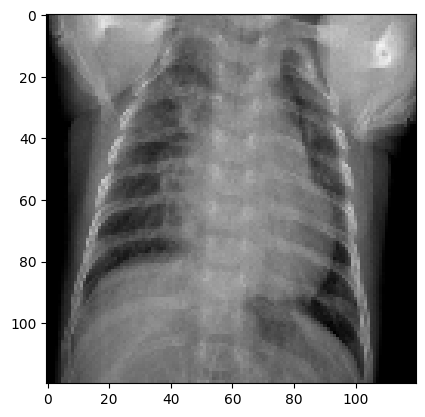

The probability of Pneumonia is :  [0.9990269]


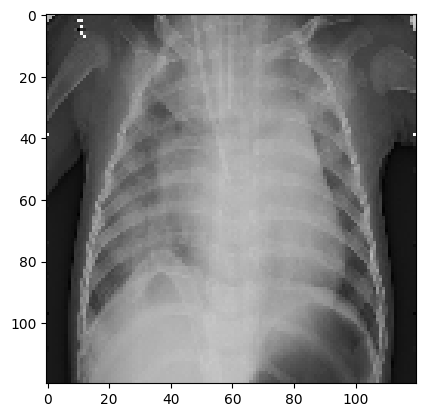

The probability of Pneumonia is :  [0.9995331]


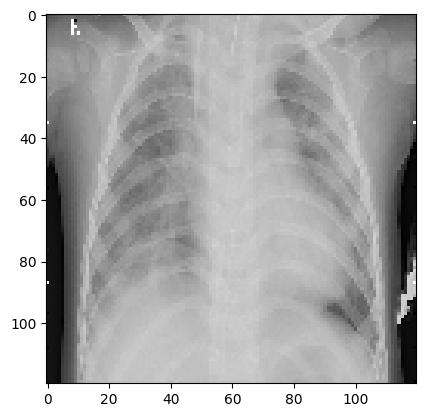

The probability of Pneumonia is :  [0.86071837]


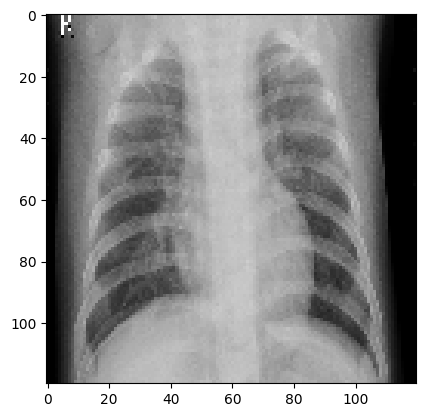

The probability of Pneumonia is :  [0.91732484]


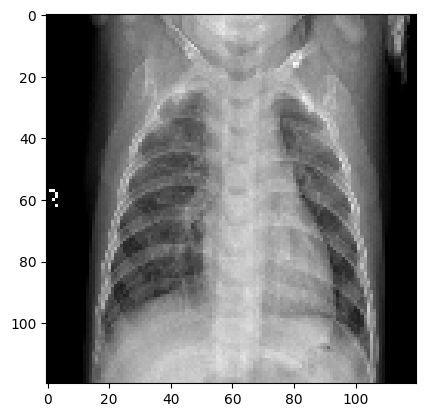

The probability of Pneumonia is :  [0.9944623]


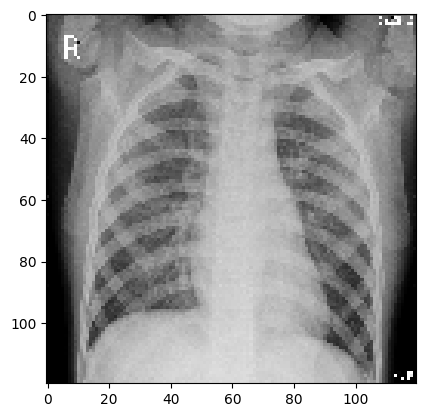

The probability of Pneumonia is :  [0.7989181]


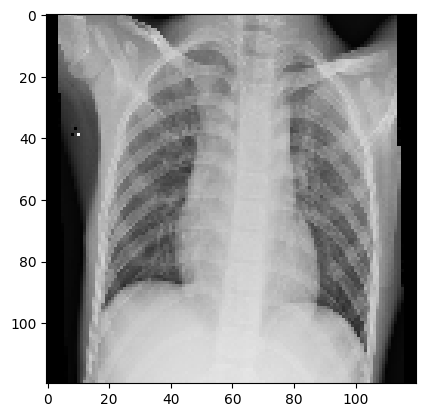

The probability of Pneumonia is :  [0.23651473]


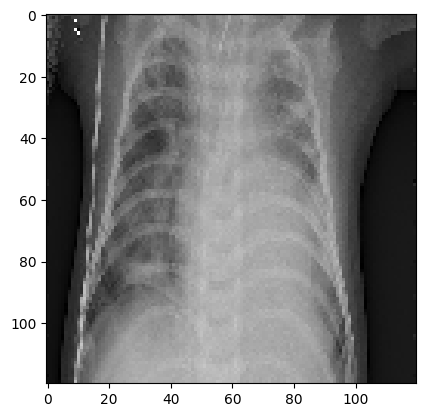

The probability of Pneumonia is :  [0.8255583]


IndexError: index 8 is out of bounds for axis 0 with size 8

In [64]:
x=next(test_data)
for i in range(0,1):
    image=x[i]
    for j in range (0, 16):
        plt.imshow(image[j])
        plt.show()
        print("The probability of Pneumonia is : ", prediction[j])